1.

Simple vs. Multiple 

Linear Regression models the relationship between one predictor and an outcome using a linear equation:
    
    outcome = beta_0 + beta_1 * predictor,
    
where beta_0 is the intercept, and beta_1 represents the slope for the predictor variable.

Multiple Linear Regression extends this by using multiple predictors:
    
    outcome = beta_0 + beta_1 * predictor_1 + beta_2 * predictor_2 + ... + beta_n * predictor_n

---
2. Continuous vs Indicator Variables

Continuous Variable: In Simple Linear Regression with a continuous predictor, the model captures a continuous linear change in the outcome as the predictor changes:
    
    outcome = beta_0 + beta_1 * continuous predictor
    
Indicator Variable: An indicator variable is binary (0 or 1), often representing categories. Using a indicator variable results in a model form:
    outcome = beta_0 + beta_1 * 1(category),
where 1(category) is 1 if the category is present and 0 otherwise.

---
3. Adding an Indicator to a Continuous Variable in Multiple Regression:
    
    outcome = beta_0 + beta_1 * continuous predictor + beta_2 * 1(category)
    
    The model captures different baseline outcomes for the categories indicated by the indicator variable while allowing the continuous predictor to influence the outcome within each category. "parallel shifts"
    
---
4. Adding an Interaction Term between a Continuous and Indicator Variable

    outcome = beta_0 + beta_1 * continuous predictor + beta_2 * 1(category) + beta_3 * (continuous predictor * 1(category))

This model form allows the slope of the continuous predictor to differ depending on the indicator variable, enabling the model to represent distinct trends for each category.

---

5. Multiple Linear Regression with Indicator Variables from a Non-Binary Categorical Variable

    outcome = beta_0 + beta_1 * 1(category1) + beta_2 * 1(category2)
    
This model allows the categorical predictor to be non-binary. Here we have category1 and category2. Here, category1 is the baseline group. Only k-1 indicators are used if there are k categories used. The coefficients for the indicator variables represent deviations from the baseline group, facilitating comparisons between each category and baseline.


2.

The variables we have is
    
    the Outcome Variable: the effectiveness of advertising or sales generated from the campaign, which is what the company aims to predict.
    
    the Predictor Variables: 
        
        the TV ad budget
        the online ad budget
        
    These variables could be either continuous or binary categories (eg. actual dollar amounts vs. high or low budgets)
    
Linear Form Without Interaction:

    sales = beta_0 + beta_1 * TV budget + beta_2 * online budget
    
    Here, the predicted sales increase lienarly with each budget independently, without accounting for any combined effect

Linear Form with Interaction:
    sales = beta_0 + beta_1 * TV budget + beta_2 * online budget + beta_3 * (TV budget * online budget)
    
The term beta_3 * (TV budget * online budget) represents the interaction, allowing the effect of one ad budget to vary depending on the level of the other

---
2.1 Making Predictions with These Models

    Without Interaction: This model predicts sales as a straightforward sum of individual effects, so we expect a linear increase in sales based on how much is spent on each ad type independently. For example, if the TV budget or online budget alone increases, sales are predicted to increase proportionally without influence from the other budget.

    With Interaction: This model allows for a scenario where the effectiveness of each advertising budget could be enhanced or reduced by the other. For instance, a higher TV budget may lead to higher predicted sales when the online budget is also high. This model is generally better if there is evidence of a combined effect between the ad channels, as it can more accurately represent complex dynamics between budgets.
    
2.2 Updating Formulas with Binary Variables for High or Low Budgets

    Without Interaction (Binary Variables):
    
    sales = beta_0 + beta_1 * 1(high TV budget) + beta_2 * 1(high online budget)
    
    This model predicts sales based solely on whether the ad budget for each platform is high or low, assuming no interaction.
    
    With Interaction (Binary Variables:
    
    sales = beta_0 + beta1 * 1(high TV budget) + beta_2 * 1(high online budget) + beta_3 * 1(high TV budget * high online budget)
    
    This model accounts for cases where high budgets in both channels may produce a stronger combined effect on sales. It helps predict sales sales more accurately if the combination of high TV and high online budgets results in a boost not captured by considering each ad type independently.

In [6]:
#Q4

import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [7]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        22:10:29   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q4 continued

The statements that "the model only explains 17.6% of the variability in the data" and "many of the coefficients are larger than 10 with strong evidence against the null hypothesis" highlight two different aspects of model interpretation that aren’t actually in conflict. 

R-squared measures how well the model as a whole explains the outcome variable, with 17.6% suggesting that much of the outcome’s variability remains unexplained by the predictors. 

In contrast, p-values indicate the significance of each predictor’s relationship to the outcome variable. Small p-values show strong evidence that certain predictors impact the outcome, even if the overall model doesn’t explain much of its variability. This means individual predictors might have statistically significant effects while the model as a whole has limited explanatory power. 

R-squared captures the total fit, while p-values show the strength of individual relationships, allowing us to understand both the overall effectiveness of the model and the influence of specific predictors.

Q4 continued

Example 

In the HP ~ Q("Sp. Def") * C(Generation) model specification:

    R-squared would give an indication of how well the combined predictor effects (defense, generation, and their interaction) explain the variability in HP.
    
    P-values for each coefficient (e.g., Sp. Def or each Generation level) show whether each predictor or interaction significantly impacts HP, independently of the overall model fit.

Q5

Cell1:

    Objective: Splits the dataset into two halves: training (pokeaman_train) and testing (pokeaman_test).
    Purpose: This separation enables the evaluation of model performance on unseen data to check generalizability.

Cell2:

        Model Specification: Defines a simple model predicting HP based on Attack and Defense.
        Fit on Training Data: model3_fit is trained on the pokeaman_train data, producing a summary that includes the "in sample" R-squared for this model.

Cell3:

    Model Prediction: Uses model3_fit to make predictions on pokeaman_test.
    R-squared Evaluation: Computes "in sample" R-squared (on training data) and "out of sample" R-squared (on testing data).
    Observation: The "in sample" R-squared (0.1477) is relatively low, indicating a modest fit, but the "out of sample" R-squared (0.2121) is slightly higher. This suggests that, although the model’s fit on training data is modest, it generalizes reasonably well to the test data without major overfitting.

Cell 4:

    Complex Model Specification: Defines a more complex model predicting HP based on several predictors and their interactions, including Attack, Defense, Speed, Legendary, Sp. Def, and Sp. Atk.
    Purpose: To observe if adding complexity increases the model's explanatory power in training and testing contexts.
    
Cell 5:

    Model Prediction: Uses the complex model (model4_fit) to make predictions on the test data.
    R-squared Evaluation: Compares "in sample" and "out of sample" R-squared values.
    Observation: The "in sample" R-squared for the complex model is 0.4671, suggesting a much better fit to the training data than the simpler model. However, the "out of sample" R-squared drops drastically to 0.0025, indicating that the model fails to generalize, likely due to overfitting.

Q5 continued:

These cells illustrate the importance of evaluating model performance on both in sample and out of sample data to assess generalizability. In this example:

    The simpler model (Cells 2 and 3) has a relatively modest fit, but its similar in-sample and out-of-sample R-squared values suggest it generalizes reasonably well.
    The complex model (Cells 4 and 5) shows high "in sample" R-squared but almost zero "out of sample" R-squared, indicating overfitting. This means the model is too tailored to the training data and fails to predict new data effectively.

Q6

Model4’s complexity, reflected in its design matrix model4_spec.exog, introduces a high level of multicollinearity, where predictor variables and their interactions are highly correlated. This correlation, measured by the condition number (a diagnostic that indicates multicollinearity), suggests that the model is sensitive to minor data fluctuations, capturing noise rather than generalizable patterns. Multicollinearity arises from having too many interdependent predictors, which makes model4 overfit the training data and fail to generalize well. Although centering and scaling predictors can reduce multicollinearity—as it did for the simpler model3—it fails to improve model4’s condition number, highlighting that model4’s specification is overly complex and poorly suited for out-of-sample prediction.

Q7:
    
Models 5, 6, 7 shows a process of refining model complexity while balancing predictive accuracy and generalizability

Model5: 

    This model builds on model3 and model4 by including key predictors (Attack, Defense, Speed, etc.) and introducing categorical variables (Generation, Type 1, Type 2). By adding more features and indicators but keeping the interactions minimal, model5 seeks to capture more variation without overwhelming complexity. The inclusion of categorical indicators helps the model differentiate among levels of the categorical variables, potentially enhancing generalizability without excessive multicollinearity.

Model6: 

    Model6 further refines the approach by selecting only those predictors and indicators from model5 that showed significant associations. This step simplifies the model, reducing the chance of overfitting by removing unnecessary complexity and focusing on variables with substantial evidence for their predictive power. This parsimony makes model6 more likely to generalize to new data.

Model7: 

    Model7 takes an additional step by introducing specific interactions among the remaining continuous predictors, potentially capturing synergistic effects between variables like Attack and Speed. To address multicollinearity concerns from model4, model7 undergoes centering and scaling of continuous variables, reducing the condition number to an acceptable range. This final model aims to balance complexity with evidence-based selection and multicollinearity reduction, resulting in a more generalizable predictive model.

Q8:
    
    The purpose of this demonstration is to evaluate the stability and generalizability of model performance by repeatedly fitting a model on randomly split train-test datasets and observing variations in "in sample" and "out of sample" R-squared values. This helps us understand how dependent model performance is on the specific train-test split and reveals the potential for overfitting or instability due to sampling variations.

    By looping through multiple random splits, we can track the range of R-squared values both for training (in sample) and testing (out of sample). If "in sample" R-squared is consistently higher than "out of sample," we may observe signs of overfitting, where the model fits noise specific to the training set. Conversely, if the "out of sample" R-squared remains close to or exceeds the "in sample" R-squared, it suggests that the model generalizes well, indicating that the associations detected are more stable across different data samples.
    
    

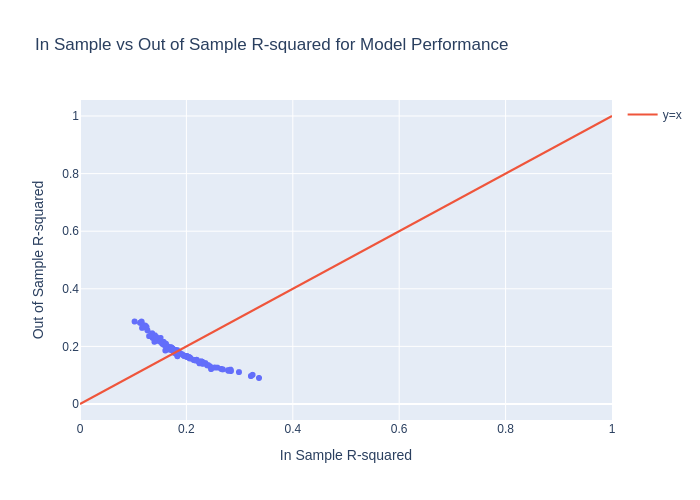

In [18]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

# Data loading (if data is already loaded as pokeaman, omit this step)
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

# Model specification
linear_form = 'HP ~ Attack + Defense'

# Initialize arrays to store R-squared values
reps = 100
in_sample_Rsquared = np.zeros(reps)
out_of_sample_Rsquared = np.zeros(reps)

# Loop through multiple random train-test splits
for i in range(reps):
    # Random 50-50 train-test split without a fixed seed for variation
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Fit the model on the training data
    model_fit = smf.ols(formula=linear_form, data=pokeaman_train).fit()
    
    # Calculate "in sample" R-squared
    in_sample_Rsquared[i] = model_fit.rsquared
    
    # Calculate "out of sample" R-squared
    yhat = model_fit.predict(pokeaman_test)
    y_true = pokeaman_test['HP']
    out_of_sample_Rsquared[i] = np.corrcoef(y_true, yhat)[0,1]**2

# Store results in a DataFrame for visualization
df = pd.DataFrame({
    "In Sample R-squared": in_sample_Rsquared,
    "Out of Sample R-squared": out_of_sample_Rsquared
})

# Plotting
fig = px.scatter(df, x="In Sample R-squared", y="Out of Sample R-squared", 
                 title="In Sample vs Out of Sample R-squared for Model Performance")
fig.add_trace(go.Scatter(x=[0,1], y=[0,1], mode="lines", name="y=x", line_shape='linear'))

fig.show(renderer="png")

Q8 continued:

The scatter plot shows that most blue dots are positioned below the y=xy=x line, indicating that out-of-sample R-squared values are generally lower than in-sample values, which suggests overfitting. As in-sample R-squared increases, out-of-sample R-squared often decreases, revealing a trend where the model’s higher accuracy on training data comes at the expense of generalizability. The lack of clustering around the diagonal line highlights instability in the model’s performance across train-test splits, suggesting it fails to generalize reliably. By assessing performance over multiple splits, this plot effectively illustrates the model's inconsistent predictive power, pointing to the need for adjustments to improve its stability and reliability on unseen data.

Q9:
    
    This illustration emphasizes why model simplicity and interpretability can be more valuable than just achieving the best performance, especially when predicting future data. Initially, model7, with its more complex structure, appeared to generalize better than model6 in a random 50-50 train-test split. However, this validation method doesn’t fully reflect real-world situations where data is often gathered over time, and the goal is to use current data to predict future observations.

    The code here uses a more sequential approach, training each model on earlier generations (Generation 1 and Generations 1-5) and testing on later ones (Generation != 1 and Generation 6). This method reveals that model7’s complexity leads to overfitting: its out-of-sample R-squared significantly drops when predicting future data, unlike model6. Even though model7 initially showed higher “out of sample” R-squared in a random split, it struggles in this real-world predictive setup, suggesting that its added complexity makes it overly sensitive to specific patterns in the training data. In contrast, model6’s simpler structure delivers more consistent performance across different scenarios, showing that a more interpretable, streamlined model often proves better for predictive tasks, especially when both generalizability and interpretability are essential.

I have used ChatGPT completing this homework

ChatGPT Summary

In our interactions, we explored multiple facets of model building and validation in the context of multiple linear regression, focusing on the balance between model complexity, interpretability, and generalizability. We began by clarifying key differences between "in sample" and "out of sample" R-squared values, using repeated random train-test splits to illustrate overfitting and the need for model generalizability. The results showed that simpler models (e.g., model3) often generalize better, while complex models (e.g., model4) can overfit, capturing noise rather than true patterns. Through iterative model refinement, we examined how adding predictors or interactions impacts a model's fit and evaluated their effectiveness through coefficient significance, R-squared, and the condition number, a measure of multicollinearity.

Later, we discussed the development of models 5, 6, and 7, progressively enhancing model complexity and observing the trade-offs in generalizability and interpretability. Model7, though more complex, was shown to be less interpretable and prone to overfitting, especially when tested in a real-world, time-sequential manner. Sequential validation revealed that model7, while performing well on random splits, struggled in real-world predictive settings compared to the simpler model6. Ultimately, this exchange underscored the importance of maintaining a balance between simplicity and performance, favoring models that offer consistent predictive ability and interpretability across various scenarios.

https://chatgpt.com/share/673673e3-d310-800d-abd4-876d603364da